# Initialization

In [1]:
rm(list = ls())

library(data.table)
library(tidyverse)
library(rJava)
library(RNetLogo)

library(lhs)  # For maximin Latin hypercube sampling
library(ggplot2)
library(plotly)  # For beautiful plotting
library(caret)
library(randomForest)
library(factoextra)
library(e1071)
library(TSrepr)  # for evaluating predictive power

require(gridExtra)

options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_fram

In [2]:
folder.path = "C:/Users/paslanpatir/Desktop/TEZ_v2/"
data.path = paste0(folder.path,"data/")

nl.model.1 = "Segregation"
model.type.1 = ifelse(nl.model.1 == "Segregation", "basic", "dummy")
output.folder.1 = paste0("outputs/outputs_50_100/outputs_SampleRef_Basic")
outputs.path.1 = paste0(folder.path,output.folder.1,"/")

nl.model.2 = ifelse(nl.model.1 == "Segregation", "Segregation_Dummy", "Segregation")
model.type.2 = ifelse(model.type.1 == "basic", "dummy", "basic")
output.folder.2 = paste0("outputs/outputs_50_100/outputs_SampleRef_Dummy")
outputs.path.2 = paste0(folder.path,output.folder.2,"/")

# Parameters

In [3]:
seed.focus = c(0,1,2,3,4,5,6,7,8,20)
size.focus = 100

feature_names.1 = c("density", "%-similar-wanted")
feature_names.2 = c("density", "%-similar-wanted", "budget-multiplier-dummy", "density-multiplier-dummy", "noise-dummy", "tick-limit")

# OneShot

In [4]:
#### OneShot ####

## Model.1

In [5]:
#### Model.1 ####
one_shot_path.1 = paste0(outputs.path.1,"oneshot/")

obb_error_oneshot.1         = fread(paste0(one_shot_path.1,model.type.1,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot.1   = fread(paste0(one_shot_path.1,model.type.1,"_predictedLabels_oneshot_all",".csv"))

obb_error_oneshot.1         = obb_error_oneshot.1[(seed %in% seed.focus)]
performance_table_oneshot.1 = performance_table_oneshot.1[(size == size.focus) & (seed %in% seed.focus)  ]
predictedLabels_oneshot.1   = predictedLabels_oneshot.1[(size == size.focus) & (seed %in% seed.focus)]

#melt
performance_molten_oneshot.1 <- melt(data = performance_table_oneshot.1
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot.1 = performance_molten_oneshot.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

## Model.2

In [6]:
#### Model.2 ####
one_shot_path.2 = paste0(outputs.path.2,"oneshot/")

obb_error_oneshot.2         = fread(paste0(one_shot_path.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot.2 = fread(paste0(one_shot_path.2,model.type.2,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot.2   = fread(paste0(one_shot_path.2,model.type.2,"_predictedLabels_oneshot_all",".csv"))

obb_error_oneshot.2         = obb_error_oneshot.2[(seed %in% seed.focus)]
performance_table_oneshot.2 = performance_table_oneshot.2[(size == size.focus) & (seed %in% seed.focus)  ]
predictedLabels_oneshot.2   = predictedLabels_oneshot.2[(size == size.focus) & (seed %in% seed.focus)]

#melt
performance_molten_oneshot.2 <- melt(data = performance_table_oneshot.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot.2 = performance_molten_oneshot.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# OneShot with mtry=3

In [7]:
#### OneShot with mtry=3####

## Model.2

In [8]:
#### Model.2 ####
one_shot_path3.2 = paste0(outputs.path.2,"oneshot_mtry3/")

obb_error_oneshot3.2         = fread(paste0(one_shot_path3.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot3.2 = fread(paste0(one_shot_path3.2,model.type.2,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot3.2   = fread(paste0(one_shot_path3.2,model.type.2,"_predictedLabels_oneshot_all",".csv"))

obb_error_oneshot3.2         = obb_error_oneshot3.2[(seed %in% seed.focus)]
performance_table_oneshot3.2 = performance_table_oneshot3.2[(size == size.focus) & (seed %in% seed.focus)  ]
predictedLabels_oneshot3.2   = predictedLabels_oneshot3.2[(size == size.focus) & (seed %in% seed.focus)]

#melt
performance_molten_oneshot3.2 <- melt(data = performance_table_oneshot3.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot3.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot3.2 = performance_molten_oneshot3.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# OneShot with mtry=4

In [9]:
#### OneShot with mtry=4####

## Model.2

In [10]:
#### Model.2 ####
one_shot_path4.2 = paste0(outputs.path.2,"oneshot_mtry4/")

obb_error_oneshot4.2         = fread(paste0(one_shot_path4.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot4.2 = fread(paste0(one_shot_path4.2,model.type.2,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot4.2   = fread(paste0(one_shot_path4.2,model.type.2,"_predictedLabels_oneshot_all",".csv"))

obb_error_oneshot4.2         = obb_error_oneshot4.2[(seed %in% seed.focus)]
performance_table_oneshot4.2 = performance_table_oneshot4.2[(size == size.focus) & (seed %in% seed.focus)  ]
predictedLabels_oneshot4.2   = predictedLabels_oneshot4.2[(size == size.focus) & (seed %in% seed.focus)]

#melt
performance_molten_oneshot4.2 <- melt(data = performance_table_oneshot4.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot4.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot4.2 = performance_molten_oneshot4.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# OneShot with mtry=6

In [11]:
#### OneShot with mtry=6####

## Model.2

In [12]:
#### Model.2 ####
one_shot_path6.2 = paste0(outputs.path.2,"oneshot_mtry6/")

obb_error_oneshot6.2         = fread(paste0(one_shot_path6.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot6.2 = fread(paste0(one_shot_path6.2,model.type.2,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot6.2   = fread(paste0(one_shot_path6.2,model.type.2,"_predictedLabels_oneshot_all",".csv"))

obb_error_oneshot6.2         = obb_error_oneshot6.2[(seed %in% seed.focus)]
performance_table_oneshot6.2 = performance_table_oneshot6.2[(size == size.focus) & (seed %in% seed.focus)  ]
predictedLabels_oneshot6.2   = predictedLabels_oneshot6.2[(size == size.focus) & (seed %in% seed.focus)]

#melt
performance_molten_oneshot6.2 <- melt(data = performance_table_oneshot6.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot6.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot6.2 = performance_molten_oneshot6.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# Random Sampling Replications

In [13]:
#### Random Sampling Replications ####

## Model.1

In [14]:
#### Model.1 ####
Rd_path.1 = paste0(outputs.path.1,"Rd/")

obb_error_Rd.1              = fread(paste0(Rd_path.1,model.type.1,"_obb_error_Rd",".csv"))
performance_table_Rd.1      = fread(paste0(Rd_path.1,model.type.1,"_performance_table_Rd",".csv"))
predictedLabels_Rd.1        = fread(paste0(Rd_path.1,model.type.1,"_predictedLabels_table_Rd",".csv"))
FinalTrainData_Rd.1         = fread(paste0(Rd_path.1,model.type.1,"_FinalTrainData_Rd",".csv"))
train_candidates_Rd.1       = fread(paste0(Rd_path.1,model.type.1,"_train_candidates_table_Rd",".csv"))

obb_error_Rd.1         = obb_error_Rd.1[(seed %in% seed.focus)]
performance_table_Rd.1 = performance_table_Rd.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Rd.1   = predictedLabels_Rd.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Rd.1    = FinalTrainData_Rd.1[(seed %in% seed.focus)]
train_candidates_Rd.1  = train_candidates_Rd.1[(seed %in% seed.focus)]

#melt
performance_molten_Rd_seq.1 <- melt(data = performance_table_Rd.1
                             , id.vars = c('iter',"seed","rep","size")
                             , measure.vars = c("mae","rmse","mape"))
performance_molten_Rd_seq.1[, iter := iter - 1]
setnames(performance_molten_Rd_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Rd_seq.1 = performance_molten_Rd_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

## Model.2

In [15]:
#### Model.2 ####
Rd_path.2 = paste0(outputs.path.2,"Rd/")

obb_error_Rd.2              = fread(paste0(Rd_path.2,model.type.2,"_obb_error_Rd",".csv"))
performance_table_Rd.2      = fread(paste0(Rd_path.2,model.type.2,"_performance_table_Rd",".csv"))
predictedLabels_Rd.2        = fread(paste0(Rd_path.2,model.type.2,"_predictedLabels_table_Rd",".csv"))
FinalTrainData_Rd.2         = fread(paste0(Rd_path.2,model.type.2,"_FinalTrainData_Rd",".csv"))
train_candidates_Rd.2       = fread(paste0(Rd_path.2,model.type.2,"_train_candidates_table_Rd",".csv"))


obb_error_Rd.2         = obb_error_Rd.2[(seed %in% seed.focus)]
performance_table_Rd.2 = performance_table_Rd.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Rd.2   = predictedLabels_Rd.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Rd.2    = FinalTrainData_Rd.2[(seed %in% seed.focus)]
train_candidates_Rd.2  = train_candidates_Rd.2[(seed %in% seed.focus)]

#melt
performance_molten_Rd_seq.2 <- melt(data = performance_table_Rd.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Rd_seq.2[, iter := iter - 1]
setnames(performance_molten_Rd_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Rd_seq.2 = performance_molten_Rd_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# Adaptive Sampling Replications

In [16]:
#### Adaptive Sampling ####

## Model.1

In [17]:
#### Model.1 ####
Ad_path.1 = paste0(outputs.path.1,"Ad_sd/")

obb_error_Ad.1              = fread(paste0(Ad_path.1,model.type.1,"_obb_error_Ad",".csv"))
performance_table_Ad.1      = fread(paste0(Ad_path.1,model.type.1,"_performance_table_Ad",".csv"))
predictedLabels_Ad.1        = fread(paste0(Ad_path.1,model.type.1,"_predictedLabels_table_Ad",".csv"))
FinalTrainData_Ad.1         = fread(paste0(Ad_path.1,model.type.1,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.1       = fread(paste0(Ad_path.1,model.type.1,"_train_candidates_table_Ad",".csv"))

obb_error_Ad.1         = obb_error_Ad.1[(seed %in% seed.focus)]
performance_table_Ad.1 = performance_table_Ad.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad.1   = predictedLabels_Ad.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad.1    = FinalTrainData_Ad.1[(seed %in% seed.focus)]
train_candidates_Ad.1  = train_candidates_Ad.1[(seed %in% seed.focus)]

#melt
performance_molten_Ad_seq.1 <- melt(data = performance_table_Ad.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.1 = performance_molten_Ad_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]


In [18]:
#importance
importance_Ad.1             = fread(paste0(Ad_path.1,model.type.1,"_importance_table_Ad",".csv"))
importance_Ad.1[, iter_no := iter_no - 1]

group_importance_Ad.1 = melt(data = importance_Ad.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad.1, c("variable"),c("feature"))

## Model.2

In [19]:
#### Model.2 ####
Ad_path.2 = paste0(outputs.path.2,"Ad_sd/")

obb_error_Ad.2              = fread(paste0(Ad_path.2,model.type.2,"_obb_error_Ad",".csv"))
performance_table_Ad.2      = fread(paste0(Ad_path.2,model.type.2,"_performance_table_Ad",".csv"))
predictedLabels_Ad.2        = fread(paste0(Ad_path.2,model.type.2,"_predictedLabels_table_Ad",".csv"))
FinalTrainData_Ad.2         = fread(paste0(Ad_path.2,model.type.2,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.2       = fread(paste0(Ad_path.2,model.type.2,"_train_candidates_table_Ad",".csv"))

obb_error_Ad.2         = obb_error_Ad.2[(seed %in% seed.focus)]
performance_table_Ad.2 = performance_table_Ad.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad.2   = predictedLabels_Ad.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad.2    = FinalTrainData_Ad.2[(seed %in% seed.focus)]
train_candidates_Ad.2  = train_candidates_Ad.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad_seq.2 <- melt(data = performance_table_Ad.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.2 = performance_molten_Ad_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [20]:
#importance
importance_Ad.2             = fread(paste0(Ad_path.2,model.type.2,"_importance_table_Ad",".csv"))
importance_Ad.2[, iter_no := iter_no - 1]

group_importance_Ad.2 = melt(data = importance_Ad.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With mtry = 3

In [21]:
#### Adaptive Sampling with mtry=3 ####

## Model.2

In [22]:
#### Model.2 ####
Ad3_path.2 = paste0(outputs.path.2,"Ad_sd_mtry3/")

obb_error_Ad3.2              = fread(paste0(Ad3_path.2,model.type.2,"_obb_error_Ad_sd",".csv"))
performance_table_Ad3.2      = fread(paste0(Ad3_path.2,model.type.2,"_performance_table_Ad_sd",".csv"))
predictedLabels_Ad3.2        = fread(paste0(Ad3_path.2,model.type.2,"_predictedLabels_table_Ad_sd",".csv"))
FinalTrainData_Ad3.2         = fread(paste0(Ad3_path.2,model.type.2,"_FinalTrainData_Ad_sd",".csv"))
train_candidates_Ad3.2       = fread(paste0(Ad3_path.2,model.type.2,"_train_candidates_table_Ad_sd",".csv"))

obb_error_Ad3.2         = obb_error_Ad3.2[(seed %in% seed.focus)]
performance_table_Ad3.2 = performance_table_Ad3.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad3.2   = predictedLabels_Ad3.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad3.2    = FinalTrainData_Ad3.2[(seed %in% seed.focus)]
train_candidates_Ad3.2  = train_candidates_Ad3.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad3_seq.2 <- melt(data = performance_table_Ad3.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad3_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad3_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad3_seq.2 = performance_molten_Ad3_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [23]:
#importance
importance_Ad3.2             = fread(paste0(Ad3_path.2,model.type.2,"_importance_table_Ad_sd",".csv"))
importance_Ad3.2[, iter_no := iter_no - 1]

group_importance_Ad3.2 = melt(data = importance_Ad3.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad3.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With mtry = 4

In [24]:
#### Adaptive Sampling with mtry=4 ####

## Model.2

In [25]:
#### Model.2 ####
Ad4_path.2 = paste0(outputs.path.2,"Ad_sd_mtry4/")

obb_error_Ad4.2              = fread(paste0(Ad4_path.2,model.type.2,"_obb_error_Ad_sd",".csv"))
performance_table_Ad4.2      = fread(paste0(Ad4_path.2,model.type.2,"_performance_table_Ad_sd",".csv"))
predictedLabels_Ad4.2        = fread(paste0(Ad4_path.2,model.type.2,"_predictedLabels_table_Ad_sd",".csv"))
FinalTrainData_Ad4.2         = fread(paste0(Ad4_path.2,model.type.2,"_FinalTrainData_Ad_sd",".csv"))
train_candidates_Ad4.2       = fread(paste0(Ad4_path.2,model.type.2,"_train_candidates_table_Ad_sd",".csv"))

obb_error_Ad4.2         = obb_error_Ad4.2[(seed %in% seed.focus)]
performance_table_Ad4.2 = performance_table_Ad4.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad4.2   = predictedLabels_Ad4.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad4.2    = FinalTrainData_Ad4.2[(seed %in% seed.focus)]
train_candidates_Ad4.2  = train_candidates_Ad4.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad4_seq.2 <- melt(data = performance_table_Ad4.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad4_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad4_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad4_seq.2 = performance_molten_Ad4_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [26]:
#importance
importance_Ad4.2             = fread(paste0(Ad4_path.2,model.type.2,"_importance_table_Ad_sd",".csv"))
importance_Ad4.2[, iter_no := iter_no - 1]

group_importance_Ad4.2 = melt(data = importance_Ad4.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad4.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With mtry = 6

In [27]:
#### Adaptive Sampling with mtry=6 ####

## Model.2

In [28]:
#### Model.2 ####
Ad6_path.2 = paste0(outputs.path.2,"Ad_sd_mtry6/")

obb_error_Ad6.2              = fread(paste0(Ad6_path.2,model.type.2,"_obb_error_Ad_sd",".csv"))
performance_table_Ad6.2      = fread(paste0(Ad6_path.2,model.type.2,"_performance_table_Ad_sd",".csv"))
predictedLabels_Ad6.2        = fread(paste0(Ad6_path.2,model.type.2,"_predictedLabels_table_Ad_sd",".csv"))
FinalTrainData_Ad6.2         = fread(paste0(Ad6_path.2,model.type.2,"_FinalTrainData_Ad_sd",".csv"))
train_candidates_Ad6.2       = fread(paste0(Ad6_path.2,model.type.2,"_train_candidates_table_Ad_sd",".csv"))

obb_error_Ad6.2         = obb_error_Ad6.2[(seed %in% seed.focus)]
performance_table_Ad6.2 = performance_table_Ad6.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad6.2   = predictedLabels_Ad6.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad6.2    = FinalTrainData_Ad6.2[(seed %in% seed.focus)]
train_candidates_Ad6.2  = train_candidates_Ad6.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad6_seq.2 <- melt(data = performance_table_Ad6.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad6_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad6_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad6_seq.2 = performance_molten_Ad6_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [29]:
#importance
importance_Ad6.2             = fread(paste0(Ad6_path.2,model.type.2,"_importance_table_Ad_sd",".csv"))
importance_Ad6.2[, iter_no := iter_no - 1]

group_importance_Ad6.2 = melt(data = importance_Ad6.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad6.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With Range

In [30]:
#### Adaptive Sampling  With Range ####

## Model.1

In [31]:
#### Model.1 ####
Ad_range_path.1 = paste0(outputs.path.1,"Ad_range/")

obb_error_Ad_range.1              = fread(paste0(Ad_range_path.1,model.type.1,"_obb_error_Ad_range",".csv"))
performance_table_Ad_range.1      = fread(paste0(Ad_range_path.1,model.type.1,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad_range.1        = fread(paste0(Ad_range_path.1,model.type.1,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad_range.1         = fread(paste0(Ad_range_path.1,model.type.1,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad_range.1       = fread(paste0(Ad_range_path.1,model.type.1,"_train_candidates_table_Ad_range",".csv"))

obb_error_Ad_range.1         = obb_error_Ad_range.1[(seed %in% seed.focus)]
performance_table_Ad_range.1 = performance_table_Ad_range.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_range.1   = predictedLabels_Ad_range.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_range.1    = FinalTrainData_Ad_range.1[(seed %in% seed.focus)]
train_candidates_Ad_range.1  = train_candidates_Ad_range.1[(seed %in% seed.focus)]

#melt
performance_molten_Ad_range_seq.1 <- melt(data = performance_table_Ad_range.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_range_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_range_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_range_seq.1 = performance_molten_Ad_range_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [32]:
#importance
importance_Ad_range.1             = fread(paste0(Ad_range_path.1,model.type.1,"_importance_table_Ad_range",".csv"))
importance_Ad_range.1[, iter_no := iter_no - 1]
group_importance_Ad_range.1 = melt(data = importance_Ad_range.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad_range.1, c("variable"),c("feature"))

## Model.2

In [33]:
#### Model.2 ####
Ad_range_path.2 = paste0(outputs.path.2,"Ad_range/")

obb_error_Ad_range.2              = fread(paste0(Ad_range_path.2,model.type.2,"_obb_error_Ad_range",".csv"))
performance_table_Ad_range.2      = fread(paste0(Ad_range_path.2,model.type.2,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad_range.2        = fread(paste0(Ad_range_path.2,model.type.2,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad_range.2         = fread(paste0(Ad_range_path.2,model.type.2,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad_range.2       = fread(paste0(Ad_range_path.2,model.type.2,"_train_candidates_table_Ad_range",".csv"))

obb_error_Ad_range.2         = obb_error_Ad_range.2[(seed %in% seed.focus)]
performance_table_Ad_range.2 = performance_table_Ad_range.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_range.2   = predictedLabels_Ad_range.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_range.2    = FinalTrainData_Ad_range.2[(seed %in% seed.focus)]
train_candidates_Ad_range.2  = train_candidates_Ad_range.2[(seed %in% seed.focus)]

performance_molten_Ad_range_seq.2 <- melt(data = performance_table_Ad_range.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_range_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_range_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_range_seq.2 = performance_molten_Ad_range_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [34]:
#importance
importance_Ad_range.2             = fread(paste0(Ad_range_path.2,model.type.2,"_importance_table_Ad_range",".csv"))
importance_Ad_range.2[, iter_no := iter_no - 1]
group_importance_Ad_range.2 = melt(data = importance_Ad_range.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad_range.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With Range with mtry = 4

In [35]:
#### Adaptive Sampling  With Range ####

## Model.2

In [36]:
#### Model.2 ####
Ad4_range_path.2 = paste0(outputs.path.2,"Ad_range_mtry4/")

obb_error_Ad4_range.2              = fread(paste0(Ad4_range_path.2,model.type.2,"_obb_error_Ad_range",".csv"))
performance_table_Ad4_range.2      = fread(paste0(Ad4_range_path.2,model.type.2,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad4_range.2        = fread(paste0(Ad4_range_path.2,model.type.2,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad4_range.2         = fread(paste0(Ad4_range_path.2,model.type.2,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad4_range.2       = fread(paste0(Ad4_range_path.2,model.type.2,"_train_candidates_table_Ad_range",".csv"))

obb_error_Ad4_range.2         = obb_error_Ad4_range.2[(seed %in% seed.focus)]
performance_table_Ad4_range.2 = performance_table_Ad4_range.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad4_range.2   = predictedLabels_Ad4_range.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad4_range.2    = FinalTrainData_Ad4_range.2[(seed %in% seed.focus)]
train_candidates_Ad4_range.2  = train_candidates_Ad4_range.2[(seed %in% seed.focus)]

performance_molten_Ad4_range_seq.2 <- melt(data = performance_table_Ad4_range.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad4_range_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad4_range_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad4_range_seq.2 = performance_molten_Ad4_range_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [37]:
#importance
importance_Ad4_range.2             = fread(paste0(Ad4_range_path.2,model.type.2,"_importance_table_Ad_range",".csv"))
importance_Ad4_range.2[, iter_no := iter_no - 1]

group_importance_Ad4_range.2 = melt(data = importance_Ad4_range.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad4_range.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With Coefvar

In [38]:
#### Adaptive Sampling  With Coefvar ####

## Model.1

In [39]:
#### Model.1 ####
Ad_coefvar_path.1 = paste0(outputs.path.1,"Ad_coefvar/")

obb_error_Ad_coefvar.1              = fread(paste0(Ad_coefvar_path.1,model.type.1,"_obb_error_Ad_coefvar",".csv"))
performance_table_Ad_coefvar.1      = fread(paste0(Ad_coefvar_path.1,model.type.1,"_performance_table_Ad_coefvar",".csv"))
predictedLabels_Ad_coefvar.1        = fread(paste0(Ad_coefvar_path.1,model.type.1,"_predictedLabels_table_Ad_coefvar",".csv"))
FinalTrainData_Ad_coefvar.1         = fread(paste0(Ad_coefvar_path.1,model.type.1,"_FinalTrainData_Ad_coefvar",".csv"))
train_candidates_Ad_coefvar.1       = fread(paste0(Ad_coefvar_path.1,model.type.1,"_train_candidates_table_Ad_coefvar",".csv"))

obb_error_Ad_coefvar.1         = obb_error_Ad_coefvar.1[(seed %in% seed.focus)]
performance_table_Ad_coefvar.1 = performance_table_Ad_coefvar.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_coefvar.1   = predictedLabels_Ad_coefvar.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_coefvar.1    = FinalTrainData_Ad_coefvar.1[(seed %in% seed.focus)]
train_candidates_Ad_coefvar.1  = train_candidates_Ad_coefvar.1[(seed %in% seed.focus)]

#melt
performance_molten_Ad_coefvar_seq.1 <- melt(data = performance_table_Ad_coefvar.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_coefvar_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_coefvar_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_coefvar_seq.1 = performance_molten_Ad_coefvar_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [40]:
#importance
importance_Ad_coefvar.1             = fread(paste0(Ad_coefvar_path.1,model.type.1,"_importance_table_Ad_coefvar",".csv"))
importance_Ad_coefvar.1[, iter_no := iter_no - 1]
group_importance_Ad_coefvar.1 = melt(data = importance_Ad_coefvar.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad_coefvar.1, c("variable"),c("feature"))

## Model.2

In [41]:
#### Model.2 ####
Ad_coefvar_path.2 = paste0(outputs.path.2,"Ad_coefvar/")

obb_error_Ad_coefvar.2              = fread(paste0(Ad_coefvar_path.2,model.type.2,"_obb_error_Ad_coefvar",".csv"))
performance_table_Ad_coefvar.2      = fread(paste0(Ad_coefvar_path.2,model.type.2,"_performance_table_Ad_coefvar",".csv"))
predictedLabels_Ad_coefvar.2        = fread(paste0(Ad_coefvar_path.2,model.type.2,"_predictedLabels_table_Ad_coefvar",".csv"))
FinalTrainData_Ad_coefvar.2         = fread(paste0(Ad_coefvar_path.2,model.type.2,"_FinalTrainData_Ad_coefvar",".csv"))
train_candidates_Ad_coefvar.2       = fread(paste0(Ad_coefvar_path.2,model.type.2,"_train_candidates_table_Ad_coefvar",".csv"))

obb_error_Ad_coefvar.2         = obb_error_Ad_coefvar.2[(seed %in% seed.focus)]
performance_table_Ad_coefvar.2 = performance_table_Ad_coefvar.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_coefvar.2   = predictedLabels_Ad_coefvar.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_coefvar.2    = FinalTrainData_Ad_coefvar.2[(seed %in% seed.focus)]
train_candidates_Ad_coefvar.2  = train_candidates_Ad_coefvar.2[(seed %in% seed.focus)]

performance_molten_Ad_coefvar_seq.2 <- melt(data = performance_table_Ad_coefvar.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_coefvar_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_coefvar_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_coefvar_seq.2 = performance_molten_Ad_coefvar_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [42]:
#importance
importance_Ad_coefvar.2             = fread(paste0(Ad_coefvar_path.2,model.type.2,"_importance_table_Ad_coefvar",".csv"))
importance_Ad_coefvar.2[, iter_no := iter_no - 1]
group_importance_Ad_coefvar.2 = melt(data = importance_Ad_coefvar.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad_coefvar.2, c("variable"),c("feature"))

# Comparisons

## Model.2

### Importance

In [43]:
importance_compare.2 = rbind( data.table(group_importance_Ad.1,type = "1basic_Ad_sd")
                             ,data.table(group_importance_Ad.2,type = "1dummy_Ad_sd")
                             ,data.table(group_importance_Ad3.2,type = "2dummy_Ad_sd_mtry3")  
                             ,data.table(group_importance_Ad4.2,type = "3dummy_Ad_sd_mtry4")
                             ,data.table(group_importance_Ad6.2,type = "4dummy_Ad_sd_mtry6")
                             ,data.table(group_importance_Ad_coefvar.2, type = "5dummy_Ad_range")
                             ,data.table(group_importance_Ad4_range.2, type = "6dummy_Ad_range_mtry4")
                             ,data.table(group_importance_Ad_coefvar.2, type = "7dummy_Ad_coefvar"))
importance_compare.2 = importance_compare.2[seed %in% seed.focus]

ave_importance_compare.2 = importance_compare.2[,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,type)]

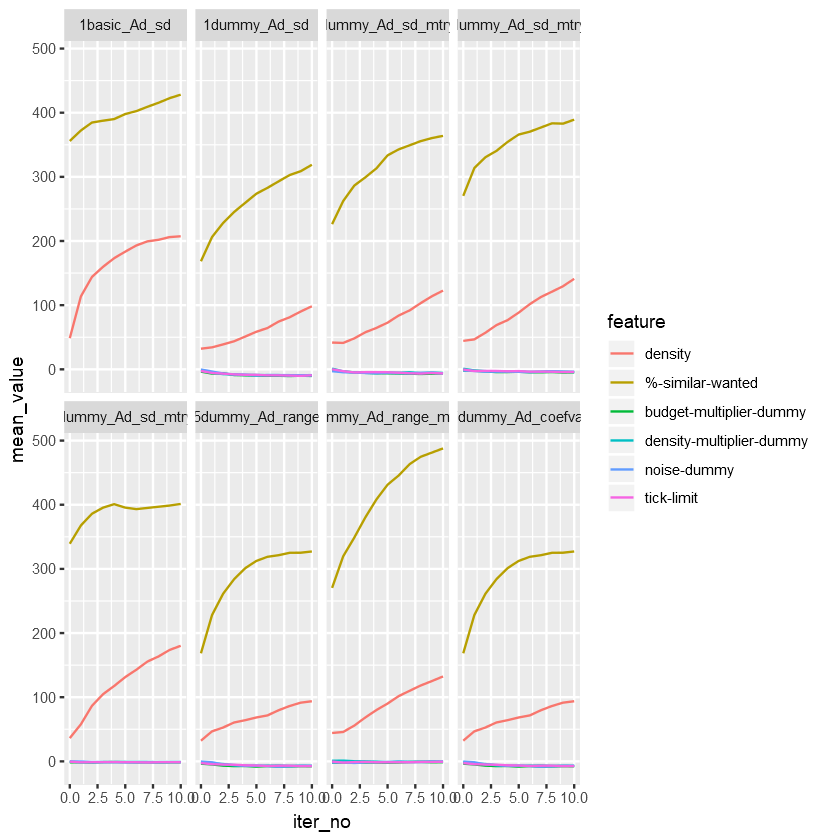

In [44]:
ave_importance.plot.2 = ggplot(ave_importance_compare.2, aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type, ncol =4)      
                          #geom_smooth(method = "gam", formula = y ~ poly(x, 3)) 
                          #geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
                          #geom_vline(xintercept = iteration_history_Ad.3[IsFeatureEliminated==1]$iter_no + 1, linetype = "dashed") 
ave_importance.plot.2

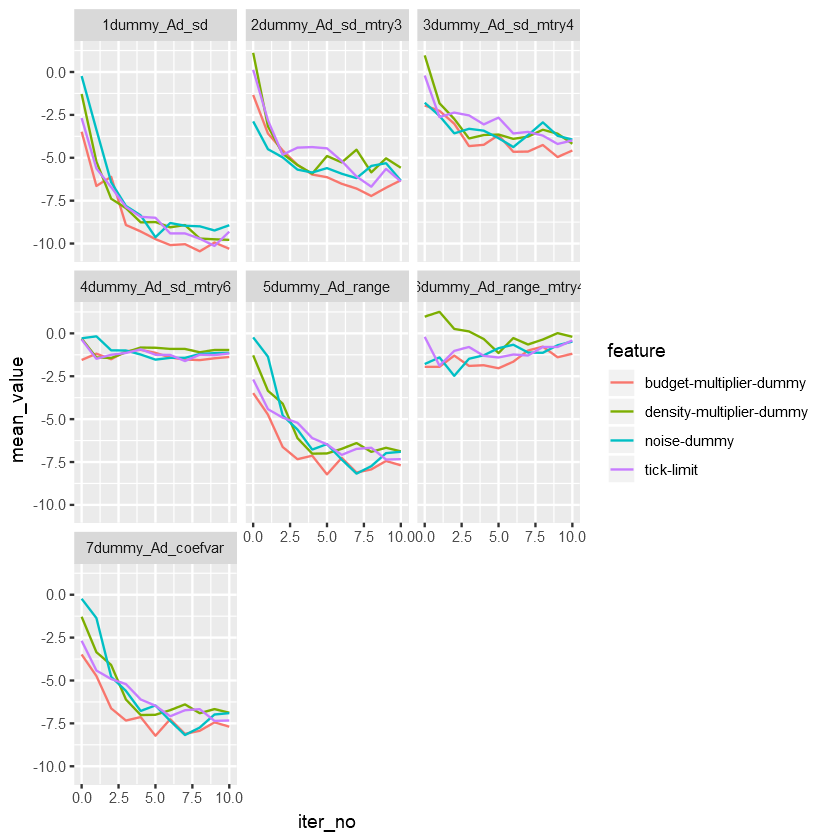

In [45]:
 ggplot(ave_importance_compare.2[!(feature %in% feature_names.1)], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type)  

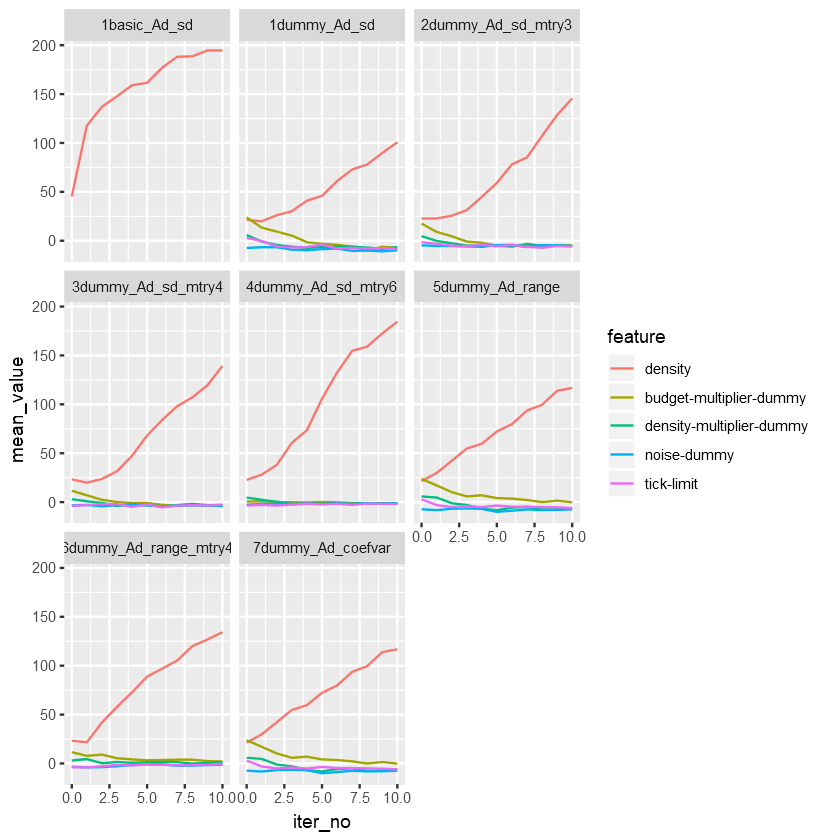

In [46]:
ave_importance_compare.21 = importance_compare.2[seed == 4,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,type)] 
ggplot(ave_importance_compare.21[(!(feature %in% c("%-similar-wanted")))  ], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type)  

In [47]:
# density'nin elendiği caseler
unique(importance_Ad4.2[is.na(`budget-multiplier-dummy`) == F & iter_no > 4,.(seed,rep) ])

seed,rep
<int>,<int>
0,1
0,2
0,3
0,4
0,5
0,6
0,7
0,8
0,9


### Test

In [48]:
test_ave_compare.2 = rbind(data.table(test_ave_performance_molten_Ad_seq.2, "type" = "1dummy_Ad_sd")
                          ,data.table(test_ave_performance_molten_Ad3_seq.2, "type" = "2dummy_Ad_sd_mtry3")
                          ,data.table(test_ave_performance_molten_Ad4_seq.2, "type" = "3dummy_Ad_sd_mtry4")
                          ,data.table(test_ave_performance_molten_Ad6_seq.2, "type" = "4dummy_Ad_sd_mtry6")
                           
                          ,data.table(test_ave_performance_molten_Ad_range_seq.2, "type" = "5dummy_Ad_range")
                          ,data.table(test_ave_performance_molten_Ad4_range_seq.2, "type" = "6dummy_Ad_range_mtry4")
                          ,data.table(test_ave_performance_molten_Ad_coefvar_seq.2, "type" = "7dummy_Ad_coefvar")
                          )
test_ave_compare.2 = test_ave_compare.2[seed %in% seed.focus]
test_ave_compare.2 = test_ave_compare.2[,.(errorvalue = mean(errorvalue)),.(iter,errortype,type)]

In [49]:
oneshot_performance_molten.2 = rbind(data.table(test_ave_performance_molten_oneshot.1, type = "1basic_Ad_sd")
                                    ,data.table(test_ave_performance_molten_oneshot.2, type = "1dummy_Ad_sd")
                                    ,data.table(test_ave_performance_molten_oneshot3.2, type = "2dummy_Ad_sd_mtry3")
                                    ,data.table(test_ave_performance_molten_oneshot4.2, type = "3dummy_Ad_sd_mtry4")
                                    ,data.table(test_ave_performance_molten_oneshot6.2, type = "4dummy_Ad_sd_mtry6"))
oneshot_performance_molten.2 = oneshot_performance_molten.2[,.(errorvalue = mean(errorvalue)),.(iter,errortype,type)]

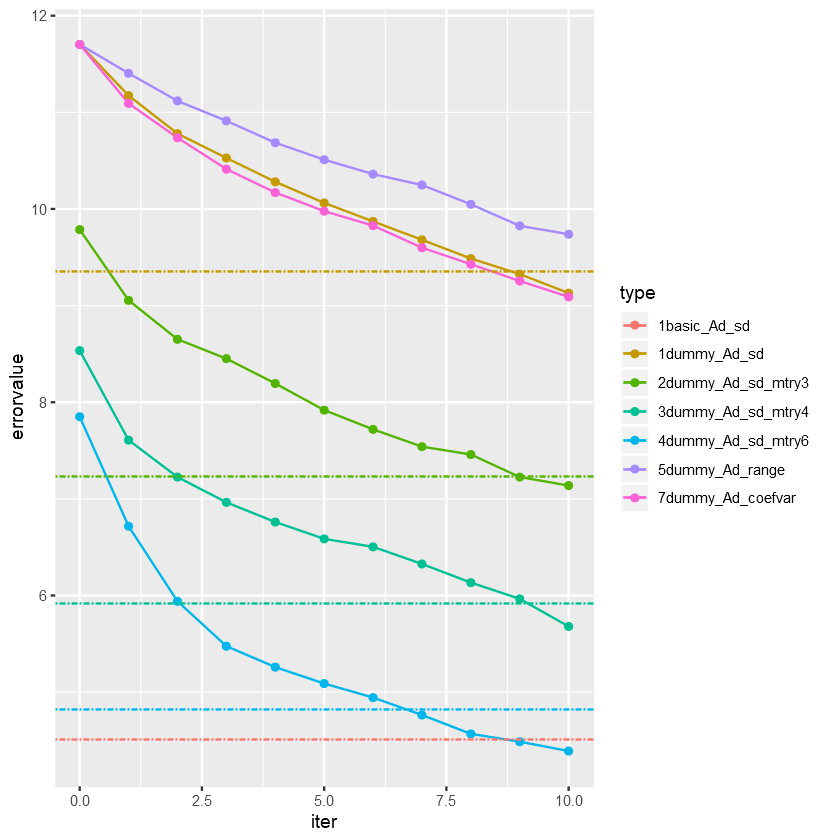

In [50]:
ggplot(data = test_ave_compare.2[errortype == "rmse" & type != c("6dummy_Ad_range_mtry4")], aes(x = iter, y = errorvalue, group=type, col=type)) +
    geom_line() +
    geom_point(data = test_ave_compare.2[errortype == "rmse" & type != c("6dummy_Ad_range_mtry4")], aes(x = iter ,y = errorvalue)) +
    geom_hline(data = oneshot_performance_molten.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype,type)], aes(yintercept = errorvalue , color = type), linetype = "twodash") 

#geom_hline(data = test_ave_performance_molten_oneshot4.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "green") +
#geom_hline(data = test_ave_performance_molten_oneshot3.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "blue") +    
#geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") 
   # geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
#facet_wrap(~type)

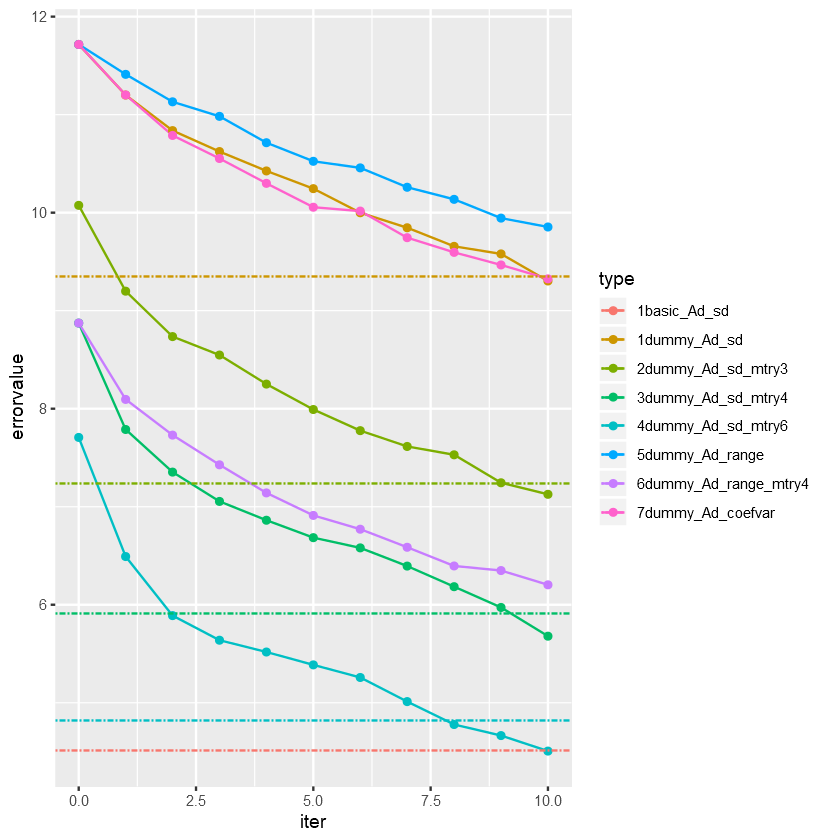

In [51]:

test_ave_compare.2 = rbind(data.table(test_ave_performance_molten_Ad_seq.2, "type" = "1dummy_Ad_sd")
                          ,data.table(test_ave_performance_molten_Ad3_seq.2, "type" = "2dummy_Ad_sd_mtry3")
                          ,data.table(test_ave_performance_molten_Ad4_seq.2, "type" = "3dummy_Ad_sd_mtry4")
                          ,data.table(test_ave_performance_molten_Ad6_seq.2, "type" = "4dummy_Ad_sd_mtry6")
                           
                          ,data.table(test_ave_performance_molten_Ad_range_seq.2, "type" = "5dummy_Ad_range")
                          ,data.table(test_ave_performance_molten_Ad4_range_seq.2, "type" = "6dummy_Ad_range_mtry4")
                          ,data.table(test_ave_performance_molten_Ad_coefvar_seq.2, "type" = "7dummy_Ad_coefvar")
                          )
test_ave_compare.2 = test_ave_compare.2[ seed %in% c(0:3)]
test_ave_compare.2 = test_ave_compare.2[,.(errorvalue = mean(errorvalue)),.(iter,errortype,type)]

ggplot(data = test_ave_compare.2[errortype == "rmse" ], aes(x = iter, y = errorvalue, group=type, col=type)) +
    geom_line() +
    geom_point(data = test_ave_compare.2[errortype == "rmse"], aes(x = iter ,y = errorvalue)) +
    geom_hline(data = oneshot_performance_molten.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype,type)], aes(yintercept = errorvalue , color = type), linetype = "twodash") 

#geom_hline(data = test_ave_performance_molten_oneshot4.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "green") +
#geom_hline(data = test_ave_performance_molten_oneshot3.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "blue") +    
#geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") 
   # geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
#facet_wrap(~type)

### Boxplot

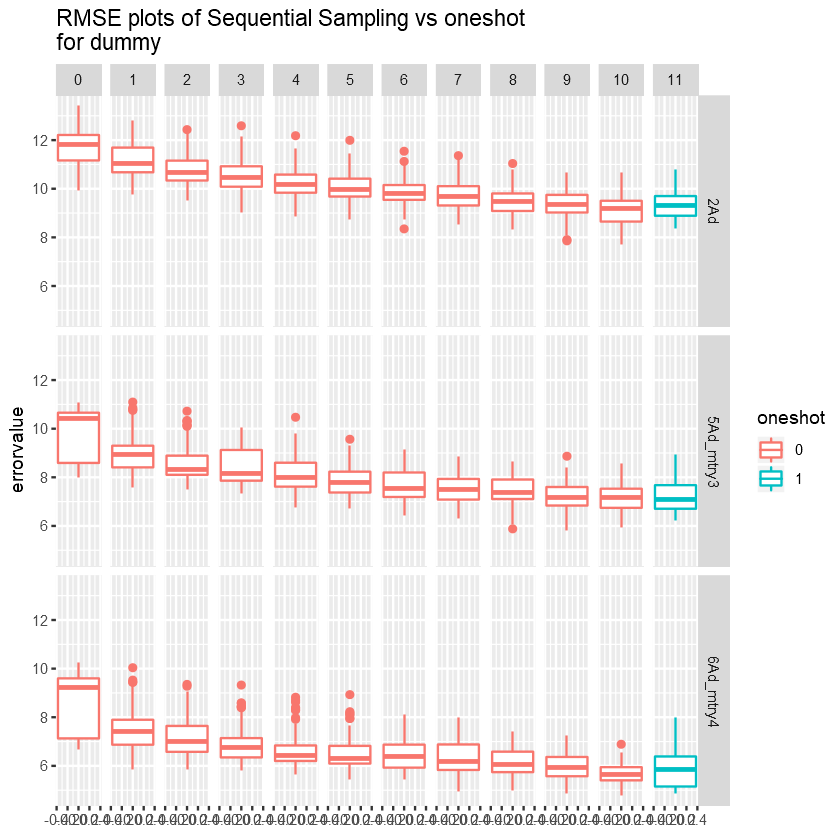

In [52]:
rmse_graph_molten_data.2 = rbind(data.table(performance_molten_Ad_seq.2[errortype == "rmse"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              #,data.table(performance_molten_Ad_range_seq.2[errortype == "rmse"], sampling = "3Ad_range",oneshot="0")
                              #,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              #,data.table(performance_molten_Ad_coefvar_seq.2[errortype == "rmse"], sampling = "4Ad_coefvar",oneshot="0")
                              #,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                             # ,data.table(performance_molten_Rd_seq.2[errortype == "rmse"], sampling = "1Rd",oneshot="0")
                             # ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                              ,data.table(performance_molten_Ad4_seq.2[errortype == "rmse"], sampling = "6Ad_mtry4",oneshot="0")
                              ,data.table(performance_molten_oneshot4.2[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "6Ad_mtry4",oneshot="1")
                              ,data.table(performance_molten_Ad3_seq.2[errortype == "rmse"], sampling = "5Ad_mtry3",oneshot="0")
                              ,data.table(performance_molten_oneshot3.2[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "5Ad_mtry3",oneshot="1")
                                                        )
test_ave_rmse_graph_molten_data.2 = rmse_graph_molten_data.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]


ggplot(test_ave_rmse_graph_molten_data.2, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

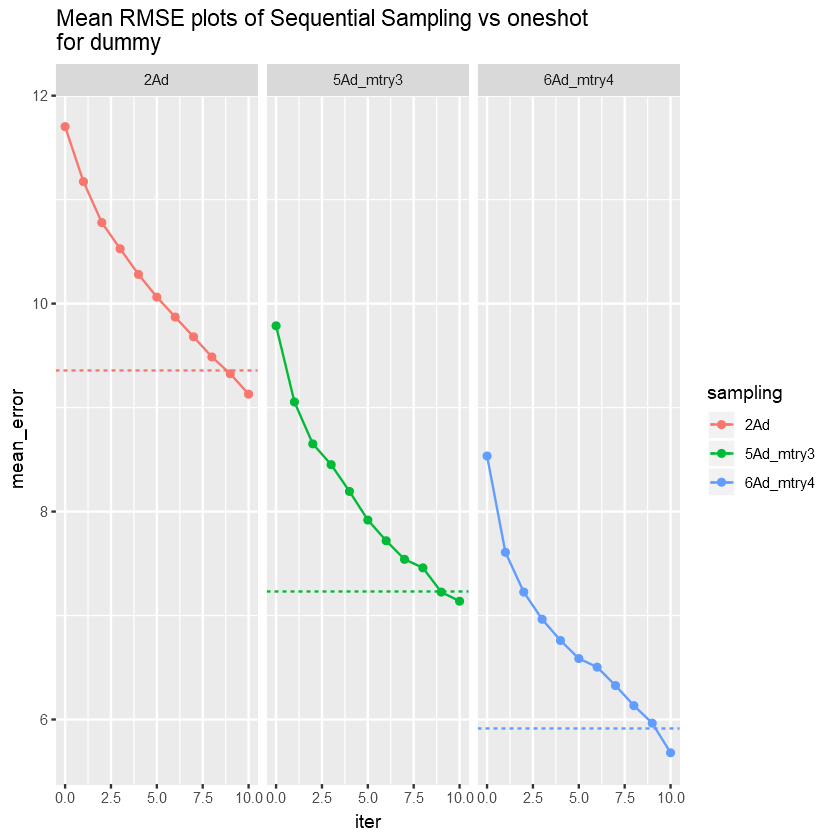

In [53]:
mean_rmse.2 = test_ave_rmse_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mean_rmse.2[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mean_rmse.2[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mean_rmse.2[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
 ggtitle(paste0("Mean RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

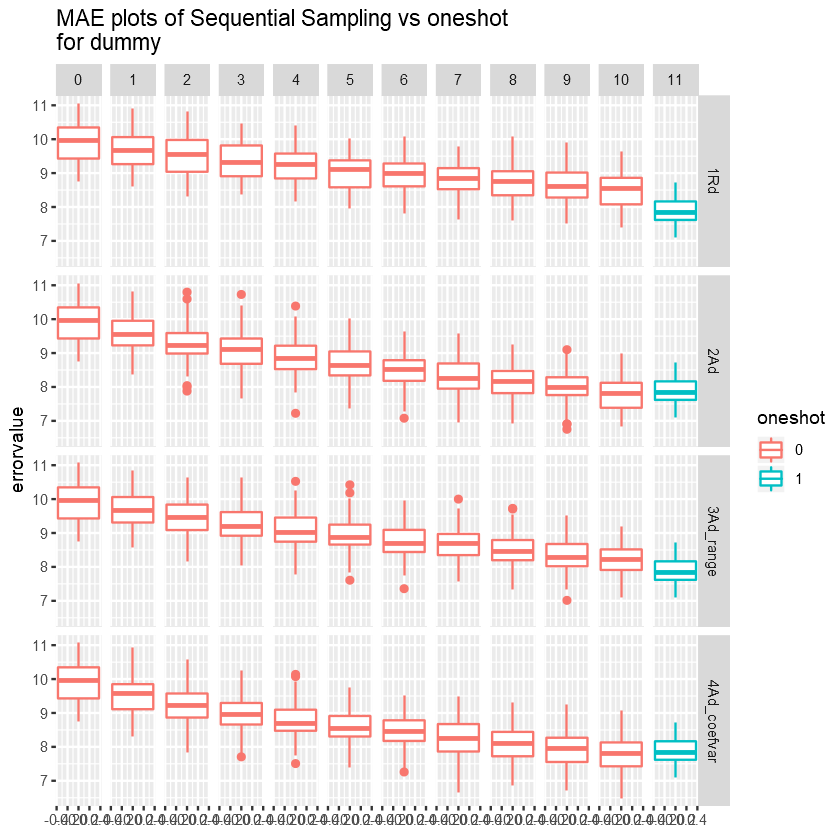

In [54]:
mae_graph_molten_data.2 = rbind(data.table(performance_molten_Ad_seq.2[errortype == "mae"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.2[errortype == "mae"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.2[errortype == "mae"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.2[errortype == "mae"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_mae_graph_molten_data.2 = mae_graph_molten_data.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]


ggplot(mae_graph_molten_data.2, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

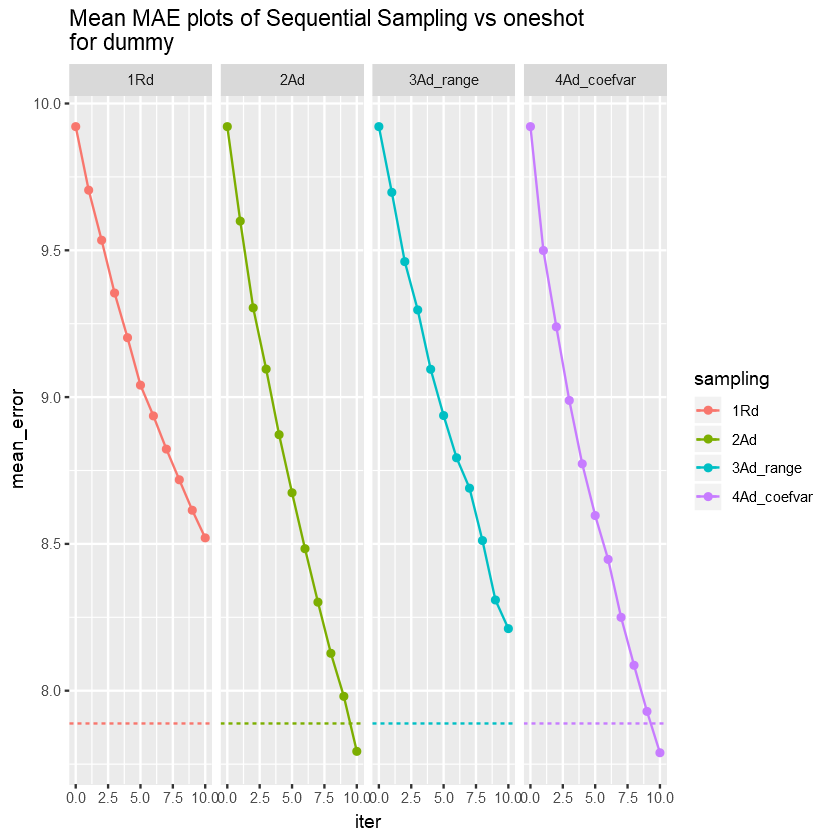

In [55]:
mae_rmse.2 = test_ave_mae_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mae_rmse.2[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mae_rmse.2[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mae_rmse.2[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

In [56]:
mape_graph_molten_data.2 = rbind(data.table(performance_molten_Ad_seq.2[errortype == "mape"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.2[errortype == "mape"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.2[errortype == "mape"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.2[errortype == "mape"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_mape_graph_molten_data.2 = mape_graph_molten_data.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

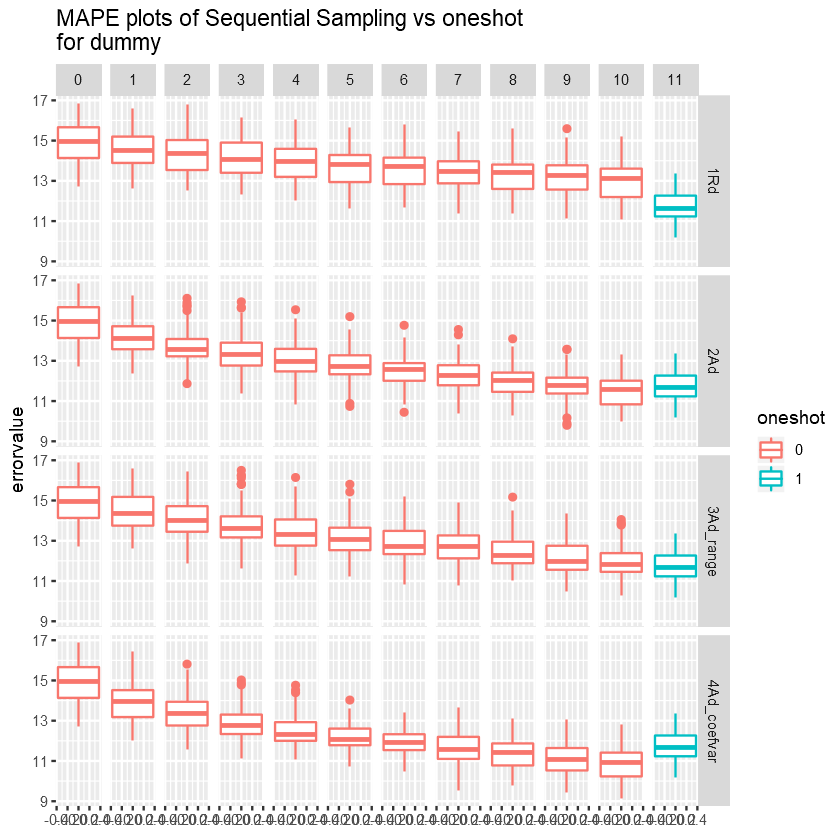

In [57]:

ggplot(test_ave_mape_graph_molten_data.2, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAPE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

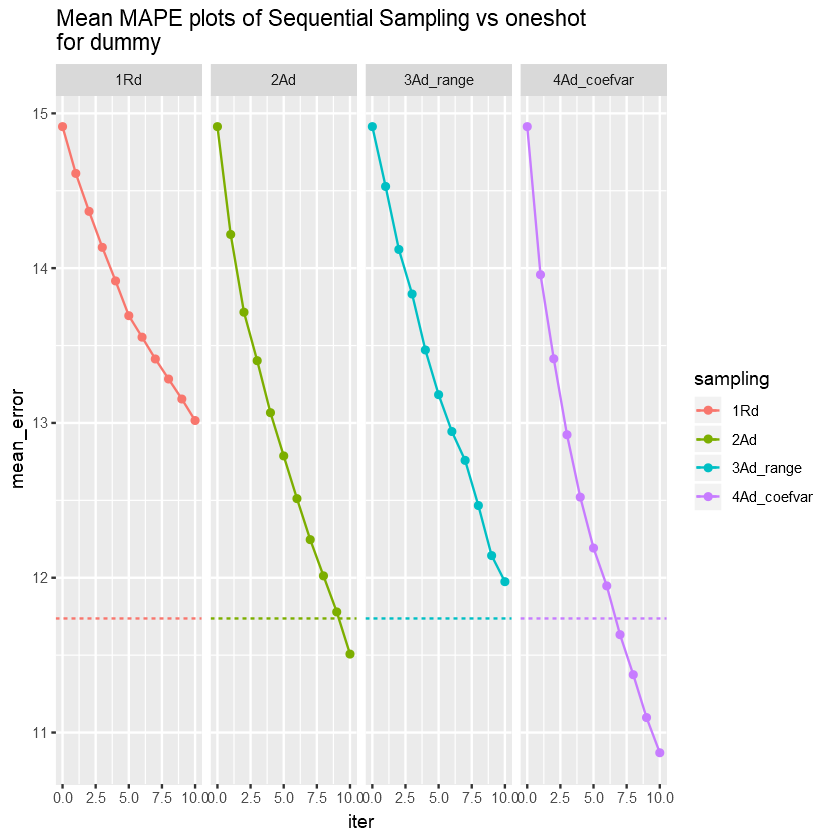

In [58]:
mape_rmse.2 = test_ave_mape_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mape_rmse.2[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mape_rmse.2[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mape_rmse.2[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAPE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

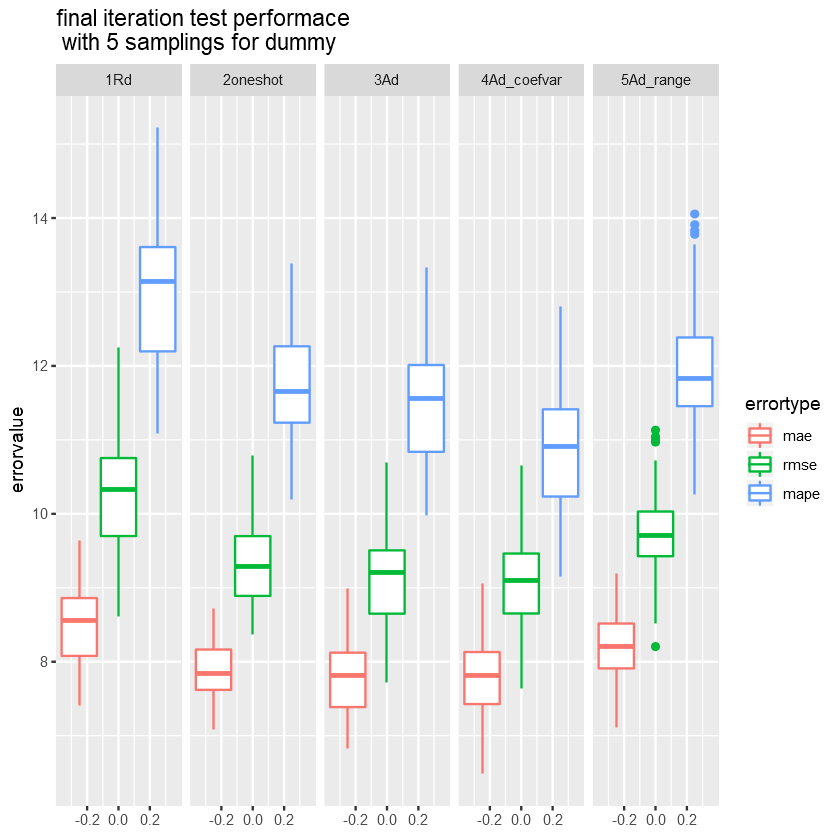

In [59]:
all_range_bxp.2 = ggplot(data = rbind(data.table(test_ave_performance_molten_Ad_range_seq.2[iter == 10], sampling = "5Ad_range")
                                     ,data.table(test_ave_performance_molten_Ad_coefvar_seq.2[iter == 10], sampling = "4Ad_coefvar")
                                     ,data.table(test_ave_performance_molten_Ad_seq.2[iter == 10], sampling = "3Ad")
                                     ,data.table(test_ave_performance_molten_Rd_seq.2[iter == 10], sampling = "1Rd")
                                     ,data.table(test_ave_performance_molten_oneshot.2, sampling = "2oneshot"))
                    , aes( y = errorvalue, group=errortype, col=errortype)) +
                    facet_wrap(~sampling, ncol = 5) +
                    geom_boxplot(aes(colour = errortype)) +
                    ggtitle(paste0("final iteration test performace","\n"," with 5 samplings for ",model.type.2))
                    
all_range_bxp.2

# 5 Scenarios_Part 1

## Model.1

In [60]:
rmse_graph_molten_data.1 = rbind(data.table(performance_molten_Ad_seq.1[errortype == "rmse"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.1[errortype == "rmse"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.1[errortype == "rmse"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.1[errortype == "rmse"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_rmse_graph_molten_data.1 = rmse_graph_molten_data.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

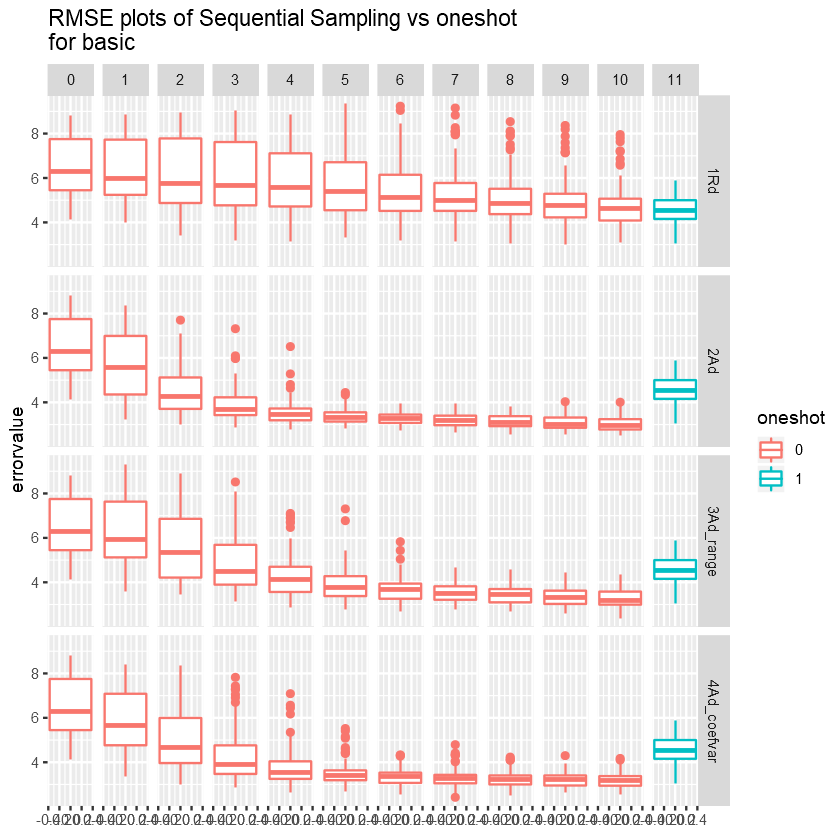

In [61]:
ggplot(test_ave_rmse_graph_molten_data.1, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

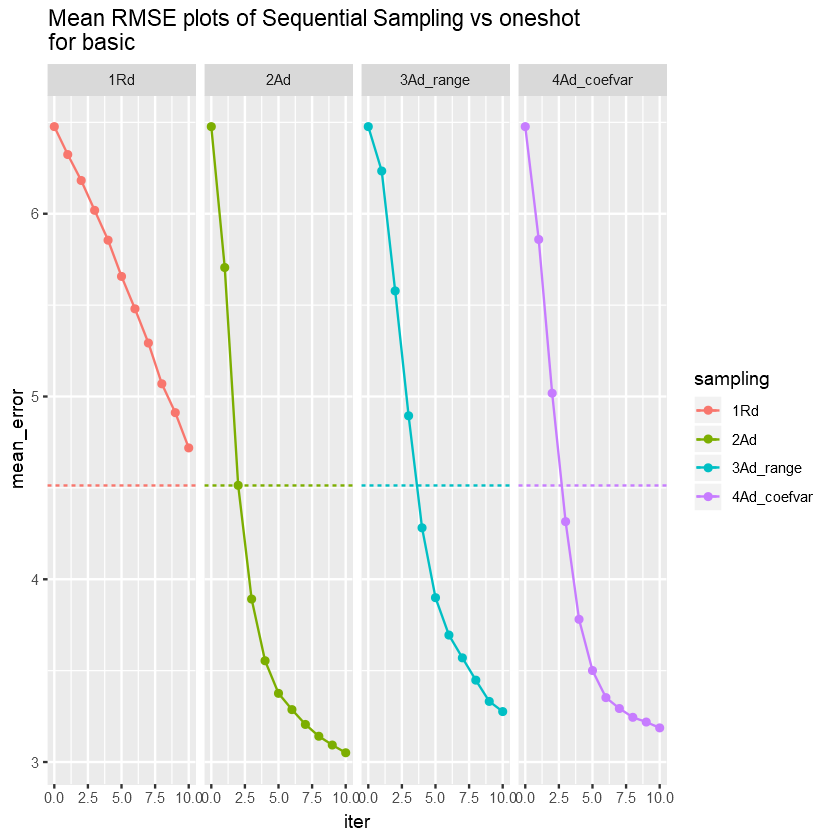

In [62]:
mean_rmse.1 = test_ave_rmse_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mean_rmse.1[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mean_rmse.1[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mean_rmse.1[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
 ggtitle(paste0("Mean RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

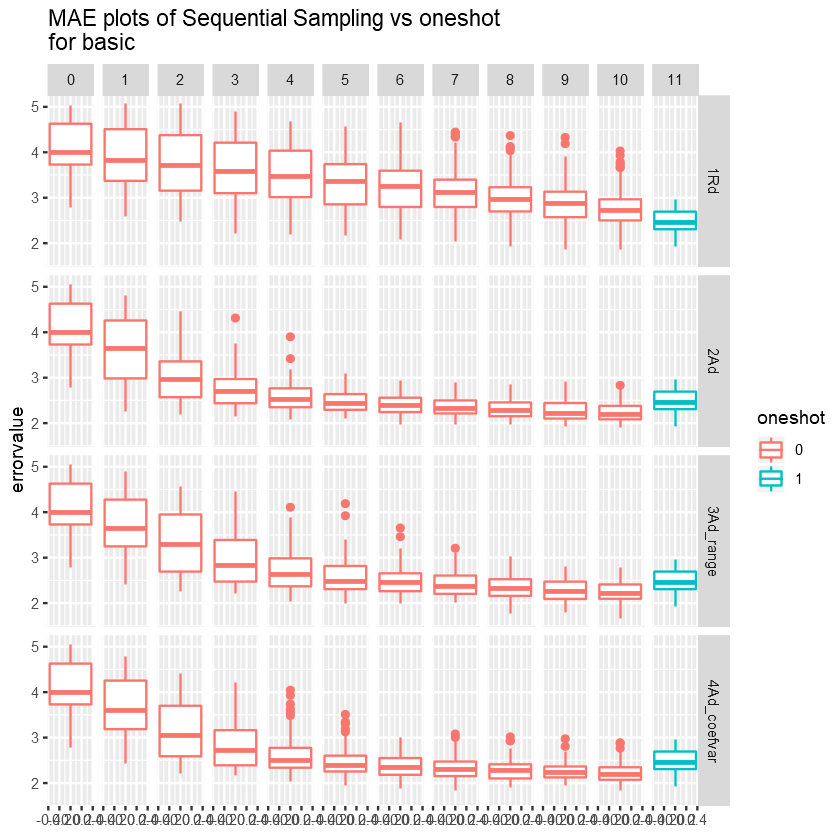

In [63]:
mae_graph_molten_data.1 = rbind(data.table(performance_molten_Ad_seq.1[errortype == "mae"], sampling = "2Ad", oneshot = "0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                             ,data.table(performance_molten_Ad_range_seq.1[errortype == "mae"], sampling = "3Ad_range",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                             ,data.table(performance_molten_Ad_coefvar_seq.1[errortype == "mae"], sampling = "4Ad_coefvar",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                             ,data.table(performance_molten_Rd_seq.1[errortype == "mae"], sampling = "1Rd",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )

test_ave_mae_graph_molten_data.1 = mae_graph_molten_data.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

ggplot(test_ave_mae_graph_molten_data.1, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

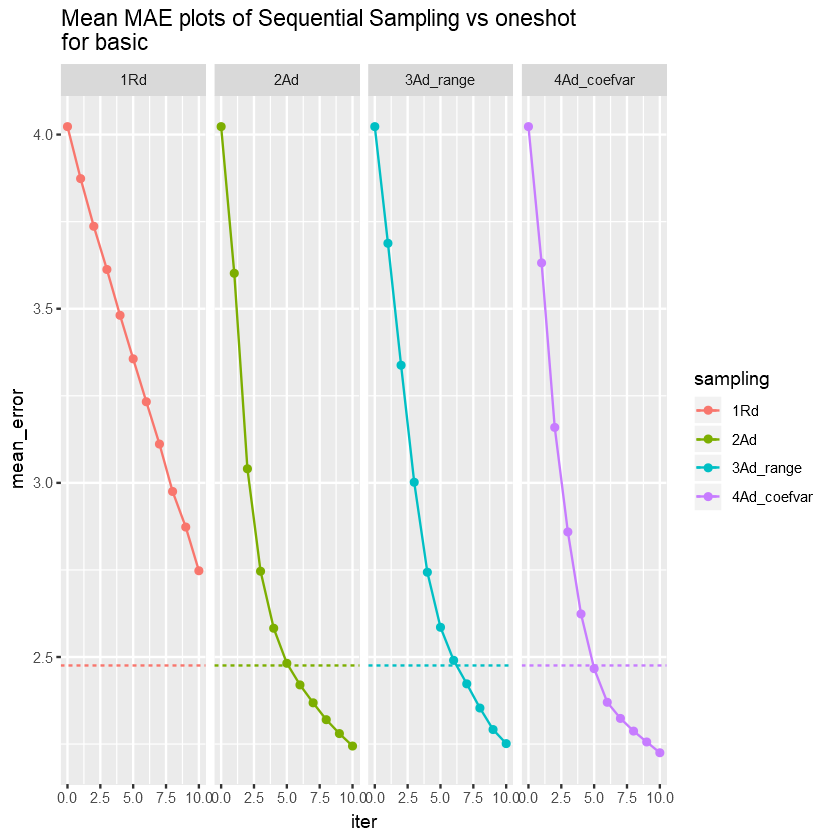

In [64]:
mae_rmse.1 = test_ave_mae_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mae_rmse.1[iter !=11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mae_rmse.1[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mae_rmse.1[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

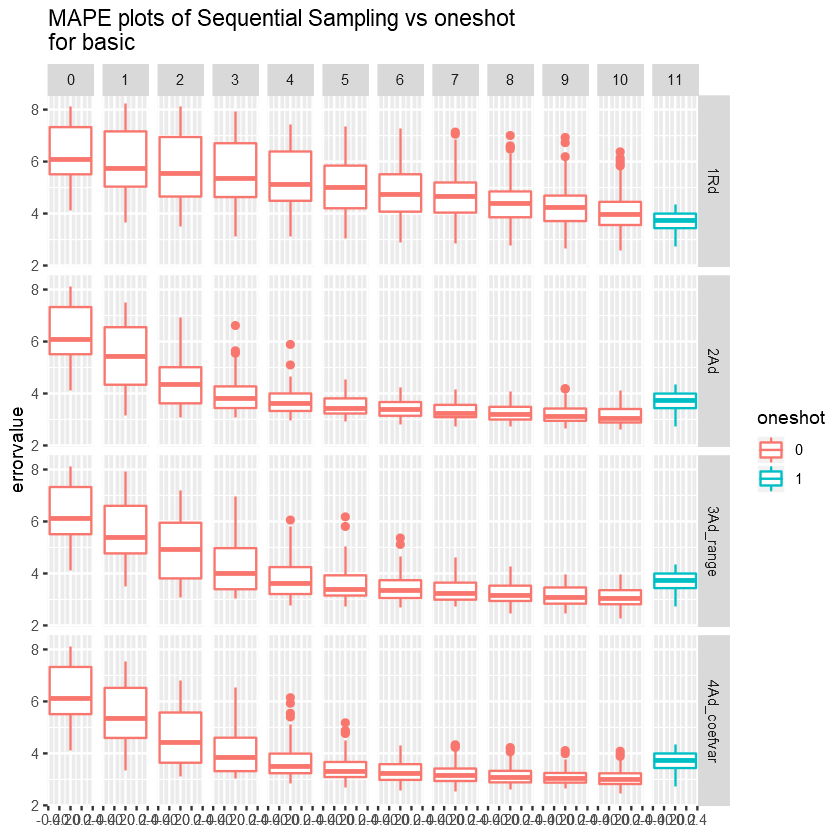

In [65]:
mape_graph_molten_data.1 = rbind(data.table(performance_molten_Ad_seq.1[errortype == "mape"], sampling = "2Ad", oneshot = "0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                             ,data.table(performance_molten_Ad_range_seq.1[errortype == "mape"], sampling = "3Ad_range",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                             ,data.table(performance_molten_Ad_coefvar_seq.1[errortype == "mape"], sampling = "4Ad_coefvar",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                             ,data.table(performance_molten_Rd_seq.1[errortype == "mape"], sampling = "1Rd",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )

test_ave_mape_graph_molten_data.1 = mape_graph_molten_data.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

ggplot(mape_graph_molten_data.1, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAPE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

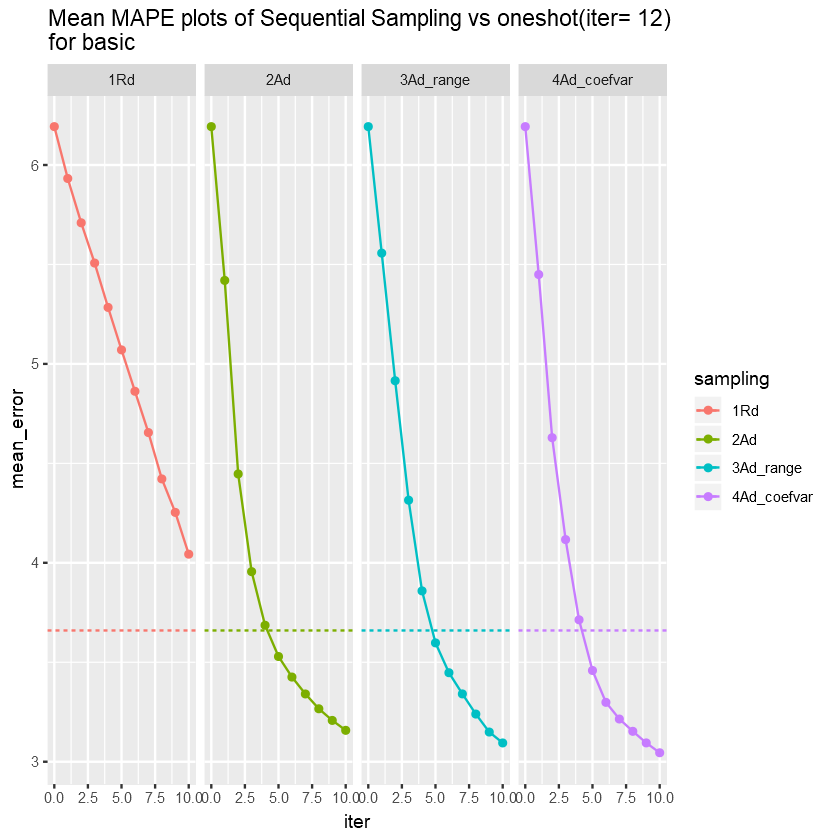

In [66]:
mape_rmse.1 = test_ave_mape_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mape_rmse.1[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mape_rmse.1[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mape_rmse.1[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAPE plots of Sequential Sampling vs oneshot(iter= 12)","\n","for ",model.type.1))

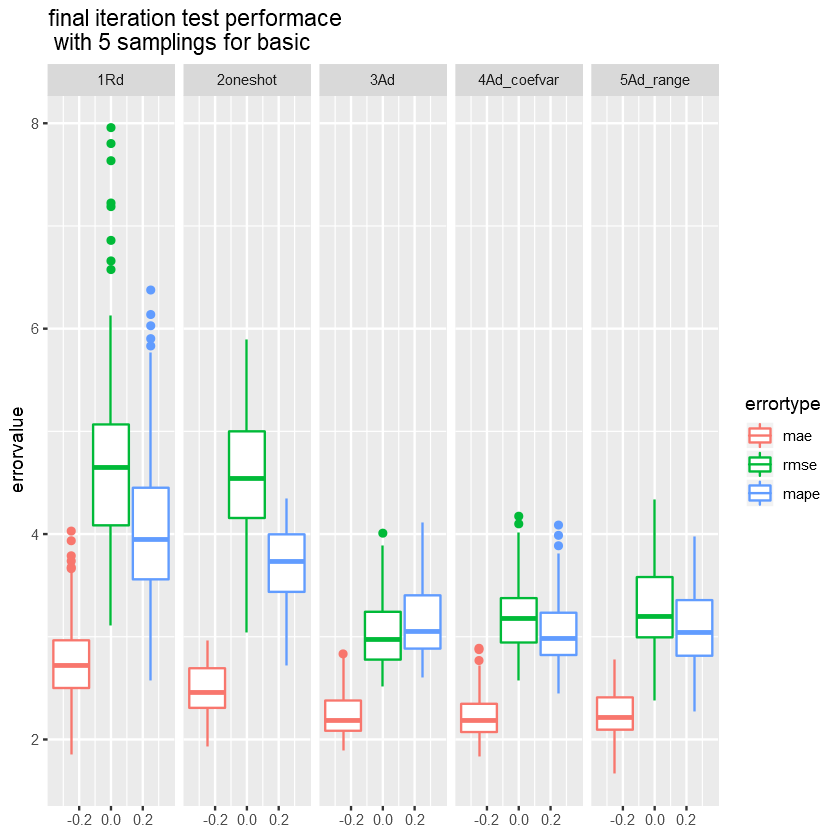

In [67]:
all_range_bxp.1 = ggplot(data = rbind(data.table(test_ave_performance_molten_Ad_range_seq.1[iter == 10], sampling = "5Ad_range")
                                     ,data.table(test_ave_performance_molten_Ad_coefvar_seq.1[iter == 10], sampling = "4Ad_coefvar")
                                     ,data.table(test_ave_performance_molten_Ad_seq.1[iter == 10], sampling = "3Ad")
                                     ,data.table(test_ave_performance_molten_Rd_seq.1[iter == 10], sampling = "1Rd")
                                     ,data.table(test_ave_performance_molten_oneshot.1, sampling = "2oneshot"))
                    , aes( y = errorvalue, group=errortype, col=errortype)) +
                    facet_wrap(~sampling, ncol = 5) +
                    geom_boxplot(aes(colour = errortype)) +
                    ggtitle(paste0("final iteration test performace","\n"," with 5 samplings for ",model.type.1))
                    
all_range_bxp.1

# General

In [68]:
train_candidates_Rd.1

density,%-similar-wanted,idx,output,iter,seed,rep
<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
60.99765,67.42552,5,99.65891,1,0,1
48.78657,83.94713,14,52.21564,1,0,1
15.21456,65.44969,48,99.60910,1,0,1
35.53118,63.92412,57,98.89920,1,0,1
52.19476,29.77198,81,74.21445,1,0,1
80.76958,73.19627,22,76.86764,2,0,1
65.33032,67.44532,45,99.61703,2,0,1
22.44392,85.47135,58,70.35592,2,0,1
43.46492,11.39668,92,59.49830,2,0,1


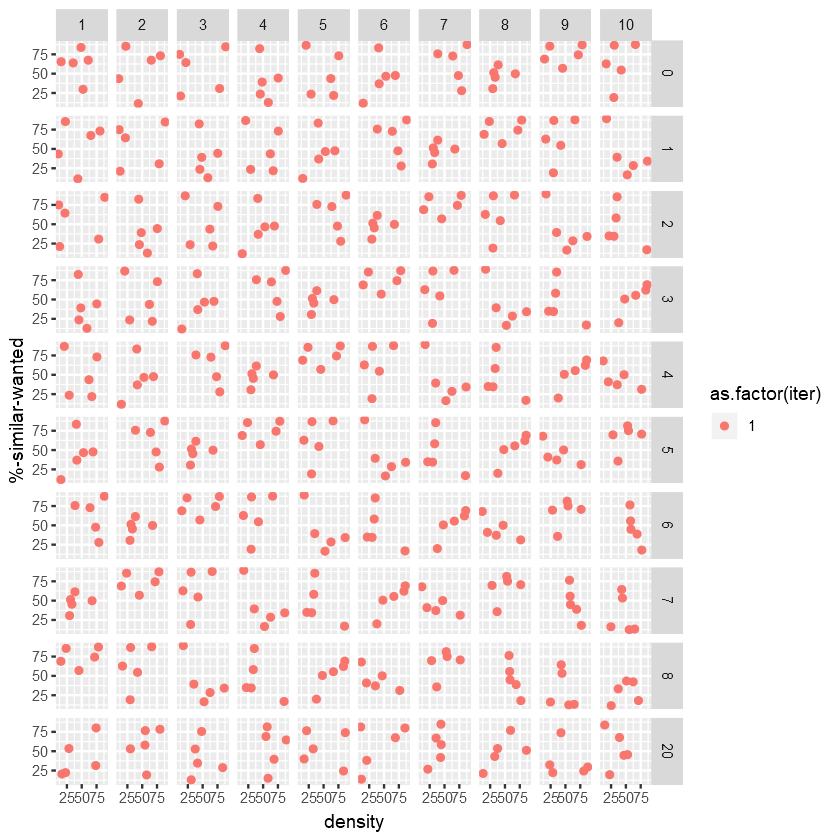

In [69]:
ggplot(data = train_candidates_Rd.1[iter == 1], aes(x = density, y = `%-similar-wanted`)) +
                     geom_point(aes(colour = as.factor(iter))) +
                     facet_grid(seed ~ rep) 

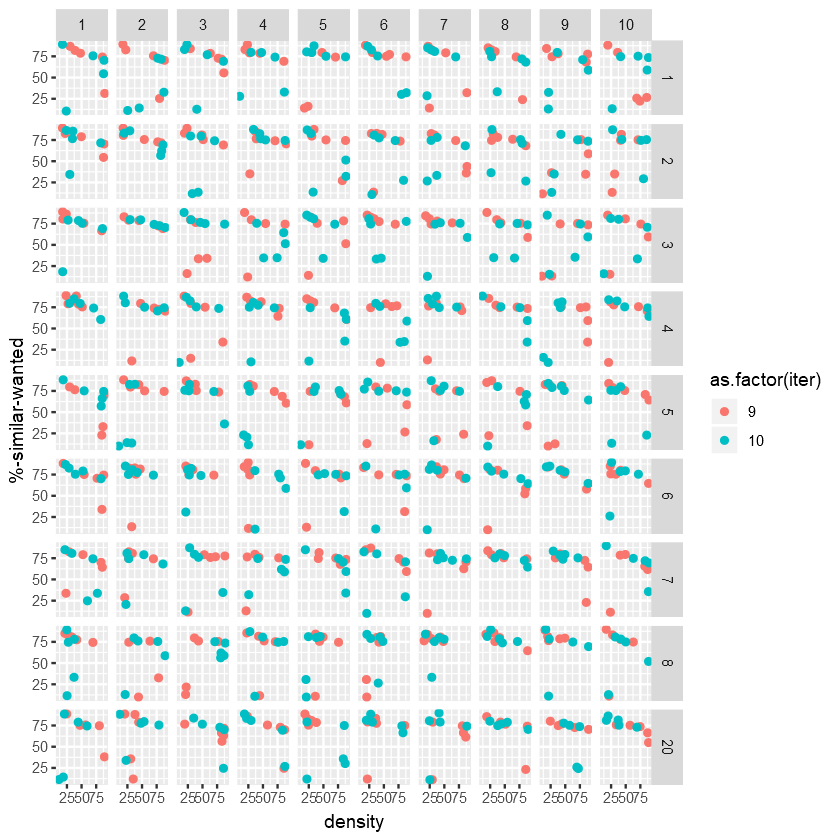

In [70]:
ggplot(data = train_candidates_Ad.1[(iter == 9 | iter == 10) & seed != 0], aes(x = density, y = `%-similar-wanted`)) +
                     geom_point(aes(colour = as.factor(iter))) +
                     facet_grid(seed ~ rep) 

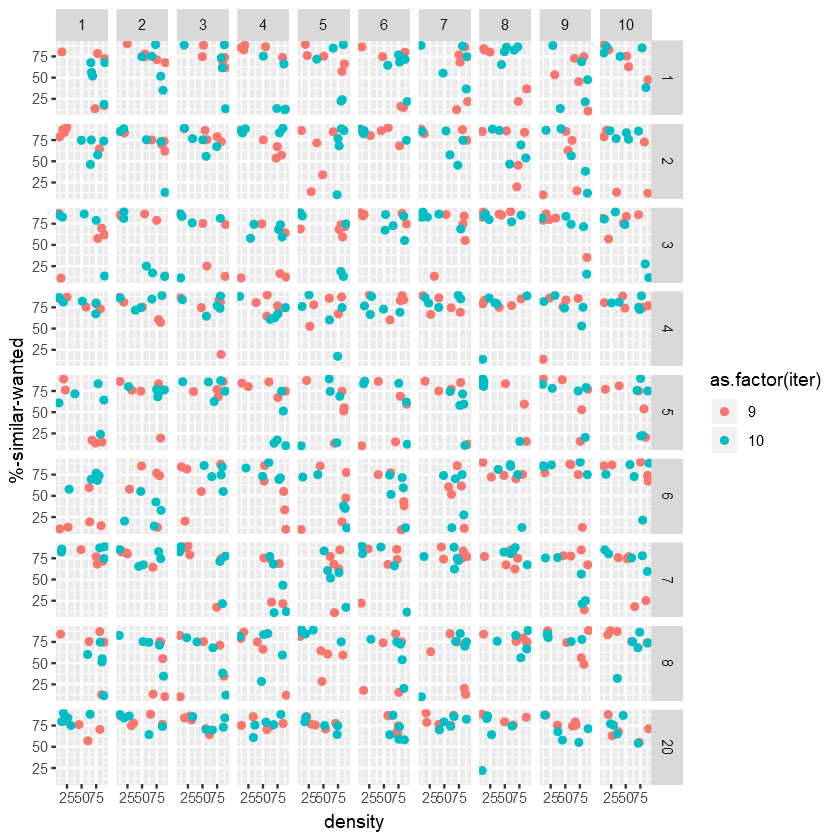

In [71]:
ggplot(data = train_candidates_Ad.2[(iter == 9 | iter == 10) & seed != 0], aes(x = density, y = `%-similar-wanted`)) +
                     geom_point(aes(colour = as.factor(iter))) +
                     facet_grid(seed ~ rep) 

Final data'nın farklı replikasyonlar için üst üste binmiş hali 

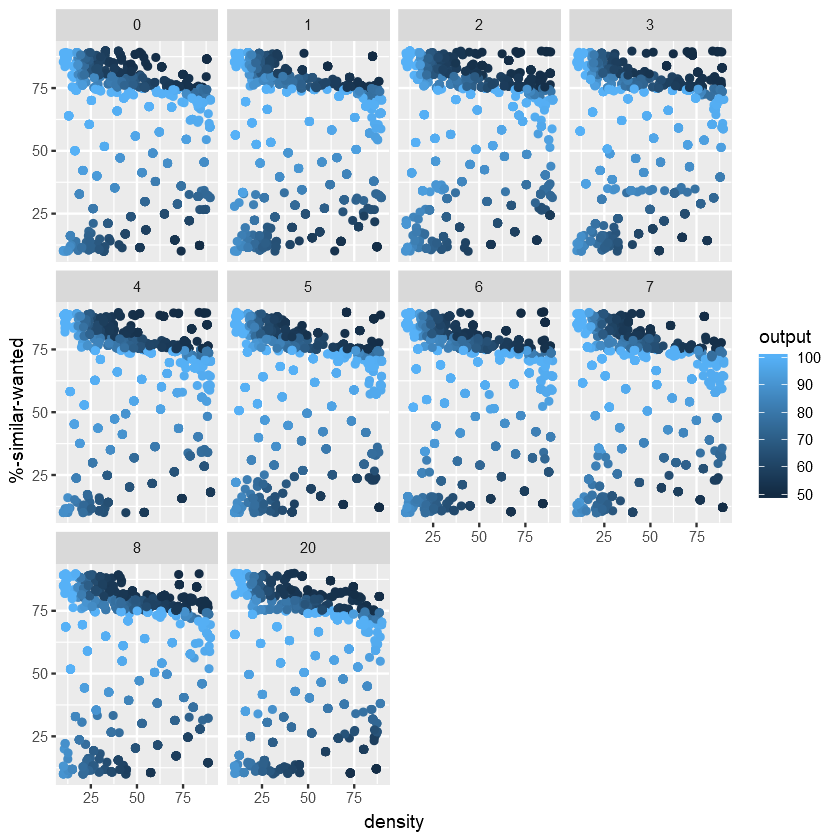

In [72]:
ggplot(data = FinalTrainData_Ad.1, aes(x = density, y = `%-similar-wanted`)) +
                    geom_point(aes(colour = output)) +
facet_wrap(~seed)

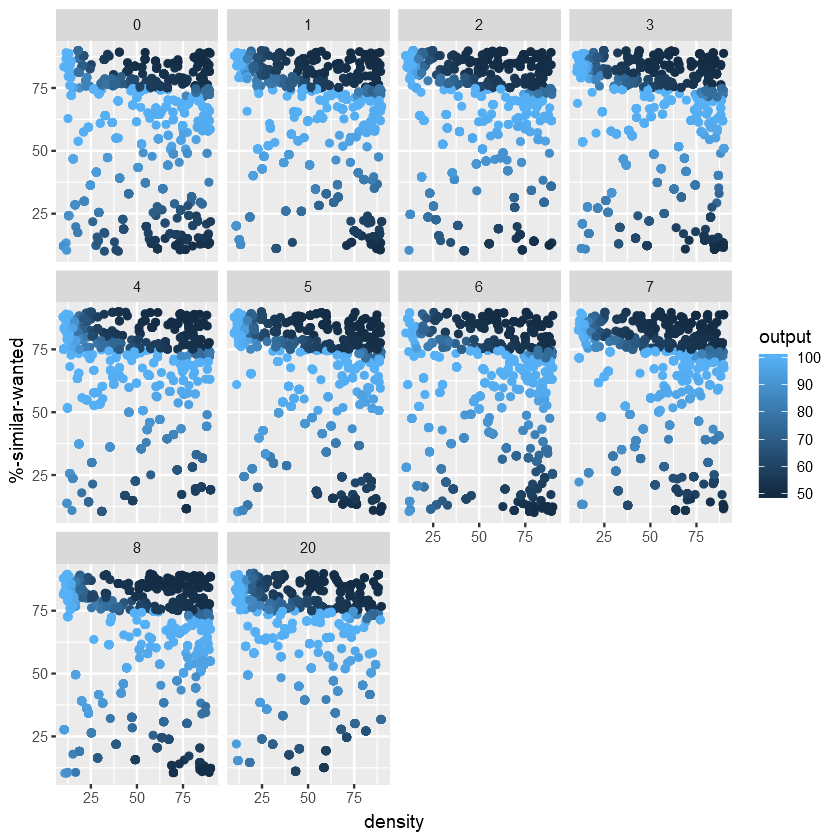

In [73]:
ggplot(data = FinalTrainData_Ad.2, aes(x = density, y = `%-similar-wanted`)) +
                    geom_point(aes(colour = output)) +
facet_wrap(~seed)

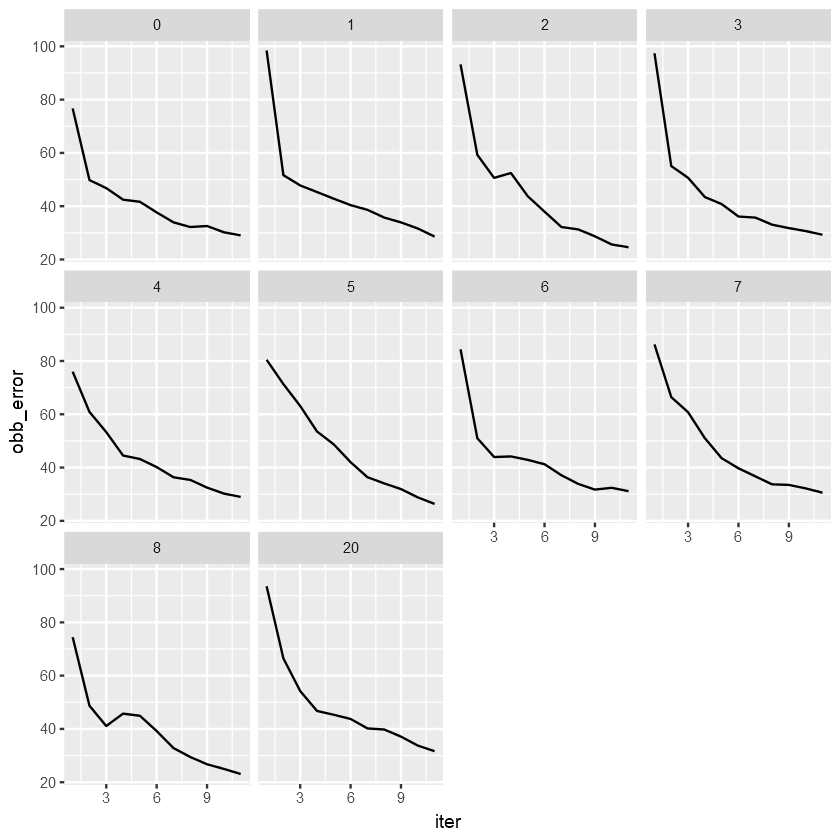

In [74]:
avg_obb_error_Ad.1 = obb_error_Ad.1[,.(obb_error = mean(obb_error)),.(iter,seed)]
ggplot(data = avg_obb_error_Ad.1, aes(x = iter, y = obb_error)) +
                    geom_line() +
facet_wrap(~seed)

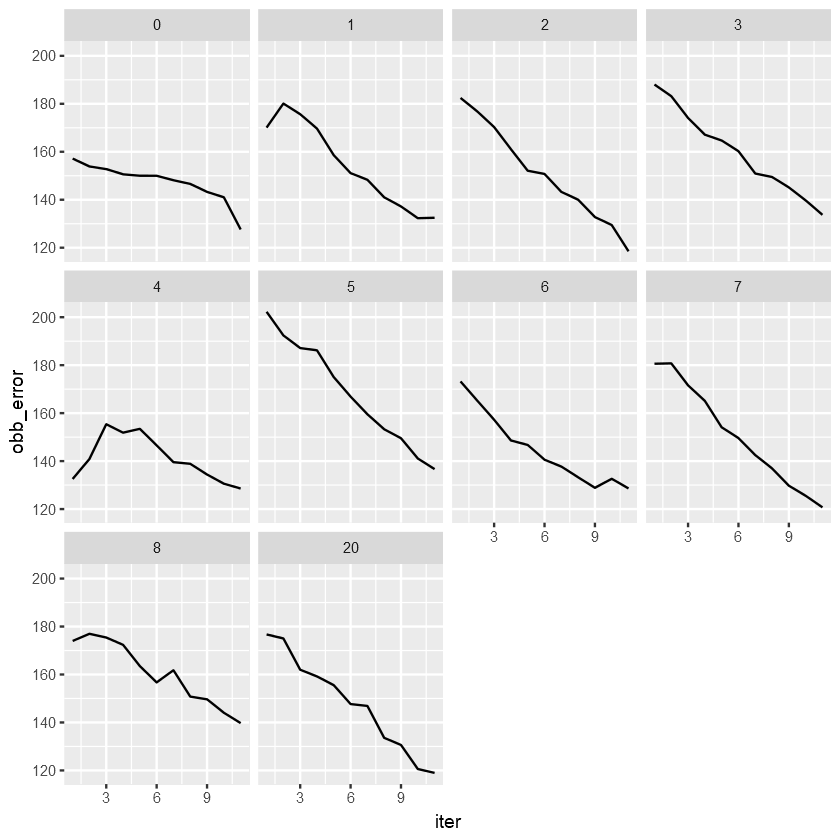

In [75]:
avg_obb_error_Ad.2 = obb_error_Ad.2[,.(obb_error = mean(obb_error)),.(iter,seed)]
ggplot(data = avg_obb_error_Ad.2, aes(x = iter, y = obb_error)) +
                    geom_line() +
facet_wrap(~seed)

In [76]:
obb_error_Rd.1

iter,obb_error,seed,rep
<int>,<dbl>,<int>,<int>
1,74.31854,0,1
2,69.77186,0,1
3,61.17499,0,1
4,49.57468,0,1
5,39.16170,0,1
6,35.49091,0,1
7,29.66399,0,1
8,32.21089,0,1
9,33.34093,0,1


In [77]:
obb_error_Rd.1             
performance_table_Rd.1     
predictedLabels_Rd.1       
FinalTrainData_Rd.1        
train_candidates_Rd.1      

iter,obb_error,seed,rep
<int>,<dbl>,<int>,<int>
1,74.31854,0,1
2,69.77186,0,1
3,61.17499,0,1
4,49.57468,0,1
5,39.16170,0,1
6,35.49091,0,1
7,29.66399,0,1
8,32.21089,0,1
9,33.34093,0,1


iter,seed,rep,size,mae,rmse,mape
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0,1,100,3.682100,5.443271,5.523289
2,0,1,100,3.445009,5.313096,5.055686
3,0,1,100,3.567099,5.501186,5.276385
4,0,1,100,3.438875,5.407377,5.090333
5,0,1,100,3.350624,5.598472,4.918107
6,0,1,100,3.291922,5.394726,4.851703
7,0,1,100,3.266521,5.597365,4.867062
8,0,1,100,3.118617,5.276163,4.554005
9,0,1,100,3.038046,5.059425,4.424584


size,density,%-similar-wanted,output,pred_output_1,RMSE_1,pred_output_2,RMSE_2,pred_output_3,RMSE_3,...,pred_output_8,RMSE_8,pred_output_9,RMSE_9,pred_output_10,RMSE_10,pred_output_11,RMSE_11,seed,rep
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
100,34.62129,36.19321,86.80774,84.16014,2.64759390,84.25890,2.548832670,84.20846,2.59927139,...,84.97909,1.8286499,84.48924,2.3185007,85.01240,1.7953365,85.15493,1.6528096,0,1
100,30.61380,41.15830,91.36661,91.09701,0.26959668,90.93846,0.428150203,91.96698,0.60037315,...,92.43690,1.0702843,92.16272,0.7961099,92.19902,0.8324080,92.10419,0.7375755,0,1
100,54.18579,13.28422,55.22673,57.12556,1.89883448,55.99173,0.765005230,56.69687,1.47014874,...,56.37030,1.1435707,56.02267,0.7959452,56.19952,0.9727935,56.22984,1.0031111,0,1
100,14.51065,38.91173,95.47250,87.60160,7.87090759,87.58565,7.886853855,89.17523,6.29727337,...,89.69639,5.7761154,89.05314,6.4193662,89.70300,5.7695004,89.48751,5.9849971,0,1
100,47.48394,55.67825,96.64692,97.08465,0.43772436,96.59104,0.055887140,96.57383,0.07309248,...,97.19522,0.5482932,97.01026,0.3633328,96.85521,0.2082864,96.79531,0.1483815,0,1
100,48.70166,64.79042,98.89756,98.77098,0.12657683,98.60666,0.290895310,98.92051,0.02295359,...,99.20781,0.3102476,99.07494,0.1773855,99.12137,0.2238125,99.15279,0.2552348,0,1
100,74.99221,87.68934,50.11928,57.02368,6.90439200,55.29148,5.172200530,56.57914,6.45985462,...,52.07540,1.9561145,52.61603,2.4967423,51.40480,1.2855173,51.02994,0.9106506,0,1
100,39.62564,66.15670,98.86038,99.20904,0.34865942,99.24019,0.379807332,99.26755,0.40717554,...,99.20260,0.3422220,99.24282,0.3824454,99.12124,0.2608612,99.20717,0.3467928,0,1
100,53.72469,10.92364,56.04616,57.14324,1.09707815,56.04336,0.002800673,57.03526,0.98909203,...,56.95475,0.9085854,56.54889,0.5027270,56.82019,0.7740267,56.63862,0.5924561,0,1


density,%-similar-wanted,output,seed,rep
<dbl>,<dbl>,<dbl>,<int>,<int>
29.49956,80.28366,62.34079,0,1
43.65841,16.93084,61.11002,0,1
71.95062,28.82286,71.54132,0,1
42.89052,71.03594,99.73481,0,1
58.58526,49.11239,88.75285,0,1
80.11068,62.51824,98.06620,0,1
16.98142,74.16895,99.95976,0,1
20.70676,42.19835,93.54481,0,1
60.01428,37.80455,81.50674,0,1


density,%-similar-wanted,idx,output,iter,seed,rep
<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
60.99765,67.42552,5,99.65891,1,0,1
48.78657,83.94713,14,52.21564,1,0,1
15.21456,65.44969,48,99.60910,1,0,1
35.53118,63.92412,57,98.89920,1,0,1
52.19476,29.77198,81,74.21445,1,0,1
80.76958,73.19627,22,76.86764,2,0,1
65.33032,67.44532,45,99.61703,2,0,1
22.44392,85.47135,58,70.35592,2,0,1
43.46492,11.39668,92,59.49830,2,0,1


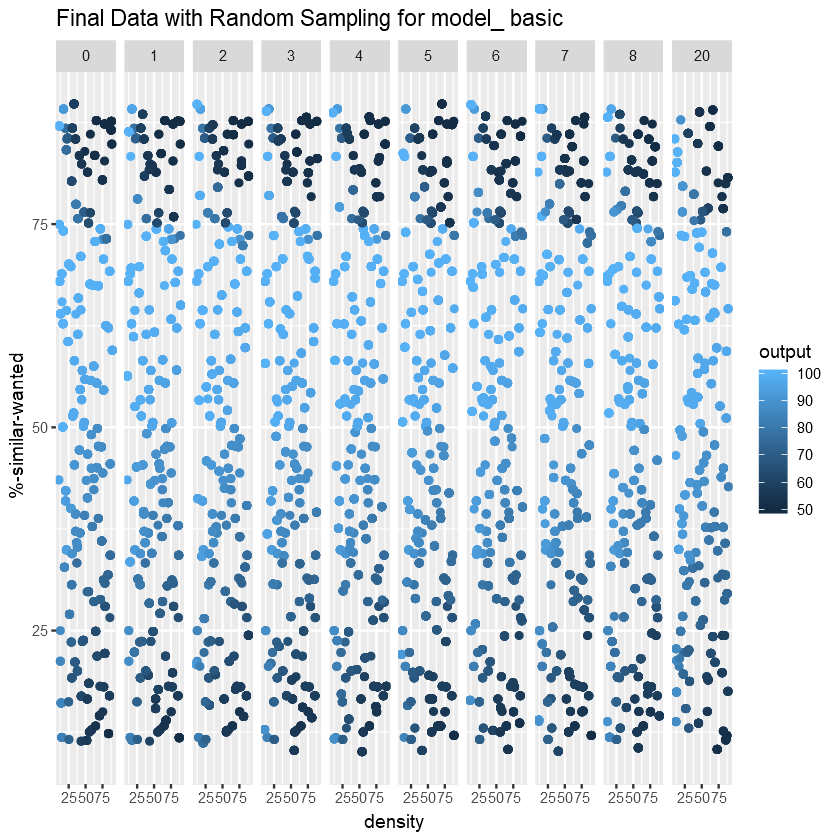

In [78]:
final_Rd_plot.1 = ggplot(data = FinalTrainData_Rd.1, aes(x = density, y = `%-similar-wanted`)) +
                     geom_point(aes(colour = output)) +
                     facet_grid( ~ seed) +
                     labs(legend = "output") +
                     ggtitle(paste0("Final Data with Random Sampling for model_ ", model.type.1))
final_Rd_plot.1